# **Clone Repository**

In [1]:
!git clone https://github.com/Mfys212/Transformer
!pip install -U -r /kaggle/working/Transformer/requirements.txt

Cloning into 'Transformer'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 234 (delta 17), reused 0 (delta 0), pack-reused 190 (from 2)
Receiving objects: 100% (234/234), 142.65 KiB | 5.09 MiB/s, done.
Resolving deltas: 100% (95/95), done.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.2 MB/s eta 0:00:0000:010:01
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=cb05e125100e0c64a68e675cc2ea63f0e203293cb9c95f682a260b8aa888d158
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages 

# **Create dataset from pandas dataframe**

Input data harus dalam bentuk dataframe pandas dengan kolom pertama sebagai kalimat yang akan diterjemahkan atau pertanyaan.

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import json

# Baca file JSON secara manual
with open("/kaggle/input/intent-mental/wawancara_remaja_cleaned.json", "r") as f:
    data = json.load(f)

# Ubah data menjadi DataFrame
df = pd.DataFrame(data)

df.head()

,pertanyaan,jawaban
0,Kenapa aku sering ngerasa cemas tiba-tiba ya?,Bisa jadi kamu lagi banyak pikiran atau ada ha...
1,Gimana sih cara ngilangin stres biar gak kepik...,Kadang olahraga ringan atau dengerin musik yan...
2,"Aku sering sedih tanpa alasan, itu normal ngga...","Itu nggak selalu normal, mungkin kamu lagi but..."
3,"Kadang aku ngerasa capek banget sama semuanya,...","Kalau capek banget, coba istirahat dulu dan ka..."
4,Gimana cara cerita ke orang tua kalau aku lagi...,Coba bilang ke orang tua pelan-pelan tentang a...


In [3]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def count_unique_tokens(questions, answers):
  """
  Hitung token unik dari dua list kalimat.

  Args:
    questions: List of questions.
    answers: List of answers.

  Returns:
    Jumlah token unik.
  """

  # Tokenisasi semua kalimat
  all_tokens = [word_tokenize(text) for text in questions + answers]
  all_tokens = [token for sublist in all_tokens for token in sublist]

  # Hapus duplikat dan hitung
  unique_tokens = set(all_tokens)
  return len(unique_tokens)

# Contoh penggunaan
questions = df['pertanyaan']
answers = df['jawaban']

unique_tokens = count_unique_tokens(questions, answers)
print("Jumlah token unik:", unique_tokens)

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Jumlah token unik: 143


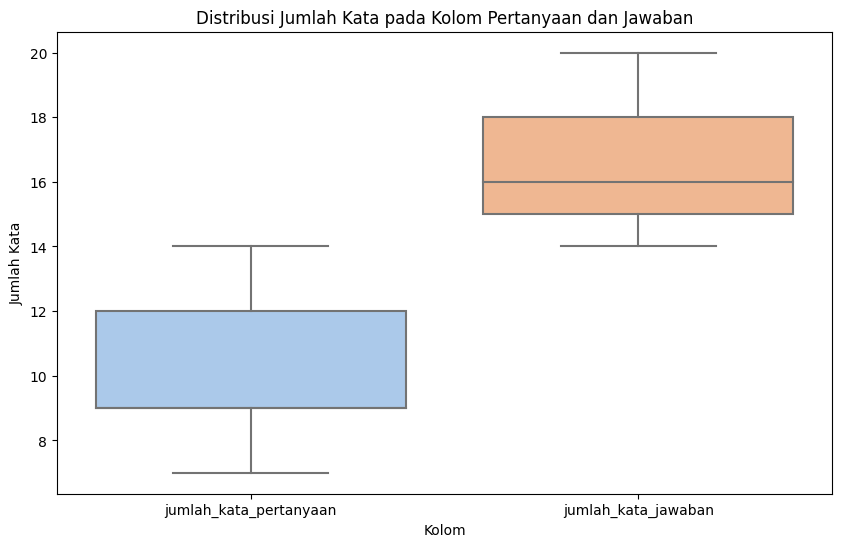

In [4]:
# 1. Hitung Jumlah Kata per Kolom
df['jumlah_kata_pertanyaan'] = df['pertanyaan'].apply(lambda x: len(x.split()))
df['jumlah_kata_jawaban'] = df['jawaban'].apply(lambda x: len(x.split()))

# 2. Gabungkan Data Jumlah Kata untuk Visualisasi
jumlah_kata = pd.melt(df[['jumlah_kata_pertanyaan', 'jumlah_kata_jawaban']],
                      var_name='kolom', value_name='jumlah_kata')

# 3. Visualisasi Distribusi Jumlah Kata
plt.figure(figsize=(10, 6))
sns.boxplot(x='kolom', y='jumlah_kata', data=jumlah_kata, palette='pastel')
plt.title('Distribusi Jumlah Kata pada Kolom Pertanyaan dan Jawaban')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Kata')
plt.show()

In [5]:
df = df.drop(['jumlah_kata_pertanyaan', 'jumlah_kata_jawaban'], axis=1)
df.head()

,pertanyaan,jawaban
0,Kenapa aku sering ngerasa cemas tiba-tiba ya?,Bisa jadi kamu lagi banyak pikiran atau ada ha...
1,Gimana sih cara ngilangin stres biar gak kepik...,Kadang olahraga ringan atau dengerin musik yan...
2,"Aku sering sedih tanpa alasan, itu normal ngga...","Itu nggak selalu normal, mungkin kamu lagi but..."
3,"Kadang aku ngerasa capek banget sama semuanya,...","Kalau capek banget, coba istirahat dulu dan ka..."
4,Gimana cara cerita ke orang tua kalau aku lagi...,Coba bilang ke orang tua pelan-pelan tentang a...


In [6]:
train, valid = df, df
train

,pertanyaan,jawaban
0,Kenapa aku sering ngerasa cemas tiba-tiba ya?,Bisa jadi kamu lagi banyak pikiran atau ada ha...
1,Gimana sih cara ngilangin stres biar gak kepik...,Kadang olahraga ringan atau dengerin musik yan...
2,"Aku sering sedih tanpa alasan, itu normal ngga...","Itu nggak selalu normal, mungkin kamu lagi but..."
3,"Kadang aku ngerasa capek banget sama semuanya,...","Kalau capek banget, coba istirahat dulu dan ka..."
4,Gimana cara cerita ke orang tua kalau aku lagi...,Coba bilang ke orang tua pelan-pelan tentang a...
...,...,...
995,Apa media sosial bikin aku makin overthinking ya?,"Iya, terlalu banyak waktu di media sosial kada..."
996,"Aku susah tidur kalau lagi kepikiran, ada tips...",Coba meditasi atau baca buku ringan sebelum ti...
997,"Kalau aku sering nggak pede sama diri sendiri,...",Itu bisa jadi karena kamu sering membandingkan...
998,Aku sering ngerasa sendiri walaupun banyak tem...,Mungkin kamu merasa kurang didengar atau dimen...


# **Define Hyperparameters**

In [7]:
from Transformer.train.train import TRANSFORMER

BATCH_SIZE = 8        # batch size
SEQ_LENGTH = 25       # max sequence
VOCAB_SIZE = 200      # vocab size
EMBED_DIM = 64        # embedding dimension
EPOCHS = 200          # num epochs
num_head = 8          # num heads in multiheads attention
num_l = 2             # num layer encoder and decoder block

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Train**

In [8]:
model, train_data, valid_data = TRANSFORMER(
    train, valid, batch=BATCH_SIZE, num_head=num_head, num_l=num_l, EMBED_DIM=EMBED_DIM, SEQ_LENGTH=SEQ_LENGTH, VOCAB_SIZE=VOCAB_SIZE)

history = model.fit(train_data, epochs=EPOCHS, validation_data=valid_data)

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - seq_acc: 0.0151 - seq_loss: 5.3026 - val_seq_acc: 0.0693 - val_seq_loss: 4.4318
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - seq_acc: 0.2384 - seq_loss: 3.9574 - val_seq_acc: 0.6995 - val_seq_loss: 2.2252
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - seq_acc: 0.7701 - seq_loss: 1.7049 - val_seq_acc: 0.9538 - val_seq_loss: 0.5153
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - seq_acc: 0.9676 - seq_loss: 0.3526 - val_seq_acc: 0.9884 - val_seq_loss: 0.0731
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - seq_acc: 0.9947 - seq_loss: 0.0573 - val_seq_acc: 1.0000 - val_seq_loss: 0.0156
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - seq_acc: 0.9991 - seq_loss: 0.0119 - val_seq_acc: 1.0000 - val_seq_loss: 0.0021
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - seq_acc: 0.9999 - seq_loss: 0.0023 - val_seq_acc: 1.0000 - val_seq_loss: 5.1705e-04
Epoch 8/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s

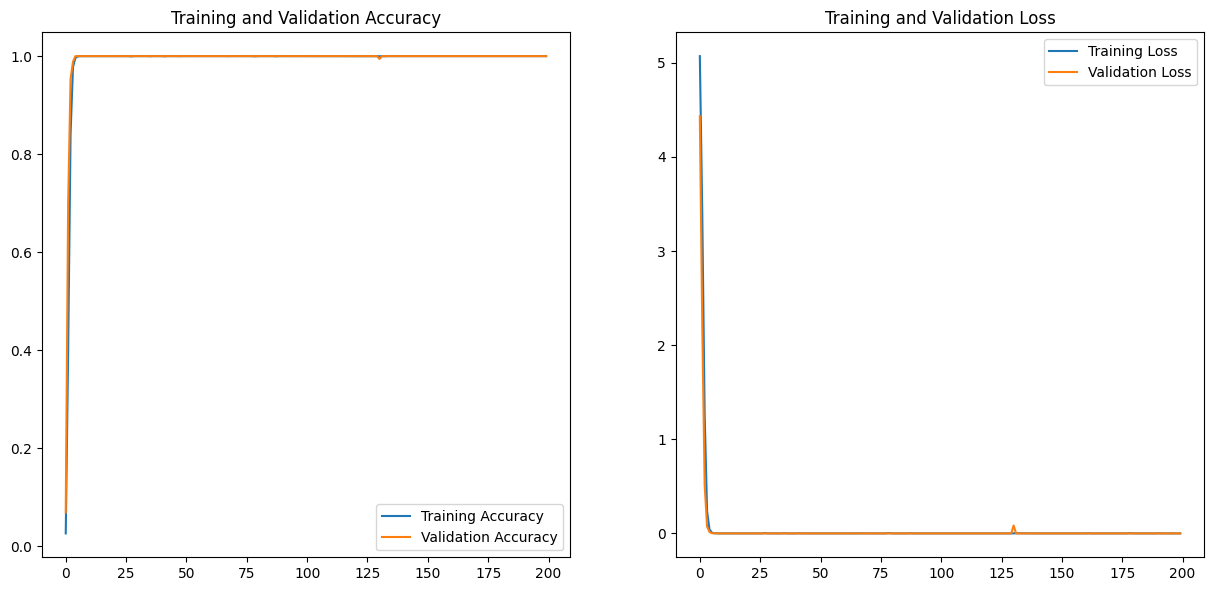

In [9]:
import matplotlib.pyplot as plt
epochs_range = range(EPOCHS)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, history.history['seq_acc'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_seq_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, history.history['seq_loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_seq_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Evaluation**

In [10]:
model.evaluate(valid_data) # acc and loss with input gorund truth in decoder

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - seq_acc: 1.0000 - seq_loss: 6.6528e-10


[1.0, 6.911589078839597e-10]

In [11]:
model.eval_metrics(valid) # without input gorund truth in decoder

Processing predictions: 100%|██████████| 1000/1000 [24:13<00:00,  1.45s/it]
Calculate metrics: 1000it [00:04, 248.63it/s]


{'BLEU': 0.7234169599496983,
 'ROUGE-1': 0.0002,
 'ROUGE-2': 0.0002,
 'ROUGE-L': 0.0002,
 'METEOR': 0.9600440613786817}

# **Prediction and Chat Reveal**

In [12]:
import tensorflow as tf
def chat():
    print("balas exit untuk keluar program")
    prompt = input("Anda: ")
    while prompt != "exit":
        print("Bot: " + model(tf.constant(prompt)))
        prompt = input("Anda: ")
chat()
# Bisa jadi kamu lagi banyak pikiran atau ada ha.

balas exit untuk keluar program


Anda:  Kenapa aku sering ngerasa cemas tiba-tiba ya?


Bot: bisa jadi kamu lagi banyak pikiran atau ada hal yang bikin kamu tertekan, coba cerita ke orang yang kamu percaya.  percaya.  percaya.


Anda:  ku sering sedih tanpa alasan, itu normal ngga sih ?


Bot: itu nggak selalu normal, mungkin kamu lagi butuh waktu buat introspeksi atau cerita ke orang terdekat.  itu sama kelebihan kamu ya!  itu


Anda:  Apa media sosial bikin aku makin overthinking ya?


Bot: iya, terlalu banyak waktu di media sosial kadang bikin overthinking. coba batasi waktu mainnya.  iya, terlalu batasi waktu mainnya.  iya, terlalu ke


Anda:  aku takut dengan ardika, coba berikan saran kepada saya!


Bot: mungkin kamu merasa kurang didengar atau ada hal yang kamu percaya.  kadang bikin kamu percaya.  itu sama kelebihan kamu ya!  ya!


Anda:  exit


# **Save and Load Model**

In [13]:
# save
model.save_weights("transformer.weights.h5")
# load
model.load_weights("transformer.weights.h5")

jika ingin menggunakan model yang sudah dilatih untuk kebutuhan deploy atau fine tuning, buat model dengan hyperparameter yang sama seperti yang digunakan model pretrained, contoh:

In [14]:
# # buat hyperparameter yang sama seperti model pretrained
# BATCH_SIZE = 8        #batch size
# SEQ_LENGTH = 40       #max sequence
# VOCAB_SIZE = 1500     #vocab size
# EMBED_DIM = 512       #embedding dimension
# EPOCHS = 40           #num epochs
# num_head = 8          #num heads in multiheads attention
# num_l = 2             #num layer encoder and decoder block

# model, train_data, valid_data = TRANSFORMER(
#     train, valid, batch=BATCH_SIZE, num_head=num_head, num_l=num_l, EMBED_DIM=EMBED_DIM, SEQ_LENGTH=SEQ_LENGTH, VOCAB_SIZE=VOCAB_SIZE)
# model.load_weights("transformer.weights.h5")

In [15]:
# # predict
# import tensorflow as tf
# prompt = "teks input di sini"
# result = model(tf.constant(prompt))
# print(result)